<a href="https://colab.research.google.com/github/daisukelab/sound-clf-pytorch/blob/master/Run-All-on-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Preparing Dataset

This tutorial notebook uses torchaudio only.

## Downloading FSDKaggle2018

    wget https://zenodo.org/record/2552860/files/FSDKaggle2018.audio_test.zip
    wget https://zenodo.org/record/2552860/files/FSDKaggle2018.audio_train.zip
    wget https://zenodo.org/record/2552860/files/FSDKaggle2018.doc.zip
    wget https://zenodo.org/record/2552860/files/FSDKaggle2018.meta.zip


In [1]:
! wget https://zenodo.org/record/2552860/files/FSDKaggle2018.audio_test.zip
! wget https://zenodo.org/record/2552860/files/FSDKaggle2018.audio_train.zip
! wget https://zenodo.org/record/2552860/files/FSDKaggle2018.doc.zip
! wget https://zenodo.org/record/2552860/files/FSDKaggle2018.meta.zip

--2021-01-18 23:02:46--  https://zenodo.org/record/2552860/files/FSDKaggle2018.audio_test.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 523294304 (499M) [application/octet-stream]
Saving to: ‘FSDKaggle2018.audio_test.zip’

FSDKaggle2018.audio 100%[===================>] 499.05M  21.4MB/s    in 25s     

2021-01-18 23:03:12 (20.1 MB/s) - ‘FSDKaggle2018.audio_test.zip’ saved [523294304/523294304]

--2021-01-18 23:03:12--  https://zenodo.org/record/2552860/files/FSDKaggle2018.audio_train.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4057528787 (3.8G) [application/octet-stream]
Saving to: ‘FSDKaggle2018.audio_train.zip’

FSDKaggle2018.audio 100%[===================>]   3.78G  9.47MB/s    in 4m 56s  

2021-01-18 23:08:09 (13.1

In [2]:
! ls

FSDKaggle2018.audio_test.zip   FSDKaggle2018.doc.zip   sample_data
FSDKaggle2018.audio_train.zip  FSDKaggle2018.meta.zip


In [3]:
! unzip -qq FSDKaggle2018.audio_test.zip
! unzip -qq FSDKaggle2018.audio_train.zip
! unzip -qq FSDKaggle2018.doc.zip
! unzip -qq FSDKaggle2018.meta.zip
! mkdir work && mv FSD* work
! ls work

FSDKaggle2018.audio_test       FSDKaggle2018.doc
FSDKaggle2018.audio_test.zip   FSDKaggle2018.doc.zip
FSDKaggle2018.audio_train      FSDKaggle2018.meta
FSDKaggle2018.audio_train.zip  FSDKaggle2018.meta.zip


In [4]:
! pip install dl-cliche torch torchaudio pytorch-lightning

     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 7.6MB 11.4MB/s 
     |████████████████████████████████| 686kB 43.8MB/s 
     |████████████████████████████████| 102kB 15.0MB/s 
     |████████████████████████████████| 1.3MB 49.4MB/s 
     |████████████████████████████████| 143kB 58.2MB/s 
     |████████████████████████████████| 296kB 52.6MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=32feacba99044f15762e266d4bc809ee452f38bb67be32df7d9652a45dfd68c9
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: torchaudio 0.7.2 has requirement torch==1.7.1, but you'll have torch 1.7.0+cu101 which is incompatible.
ERROR: pytorch-lightning 1.1.4 has requirement future>=0.17.1, but you'll have future 0.16.0 which is incompatible.
ERROR: pytorch-lightning 1.1.4 has requirement PyYAML>=5.1, but you'll have pyyaml 3.13 which 

In [5]:
! git clone https://github.com/daisukelab/sound-clf-pytorch.git
! mv work/* sound-clf-pytorch/work

Cloning into 'sound-clf-pytorch'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 35 (delta 15), reused 22 (delta 8), pack-reused 0
Unpacking objects: 100% (35/35), done.
mv: cannot move 'work' to 'sound-clf-pytorch/work': Directory not empty


In [6]:
%cd /content/sound-clf-pytorch
! ls

/content/sound-clf-pytorch
config.yaml		  README.md		  Training-Classifier.ipynb
Data-Preprocessing.ipynb  requirements.txt	  work
models.py		  Run-All-on-Colab.ipynb


# Preprocessing waveform audio into log-mel spectrogram

In [7]:
# This will make your notebook work easier (enables auto-reload, and etc ...)
from dlcliche.notebook import *
import warnings
warnings.simplefilter('ignore')

In [8]:
# Essential PyTorch
import torch
import torchaudio

# Other modules used in this notebook
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import yaml
from easydict import EasyDict

## 1-1. Example: Parameter handling with yaml

In [9]:
### CONFIGURE YOURS ###
FSD2018_ROOT = Path('work')
WORK = Path('work')

# Load configuration parameters
with open('config.yaml') as conf:
    cfg = EasyDict(yaml.safe_load(conf))

print(cfg)
print()
print('You can overwrite parameters here, example:')
print('cfg.n_mels = 128')

{'clip_length': 5.0, 'sample_rate': 44100, 'hop_length': 441, 'n_fft': 1024, 'n_mels': 64, 'f_min': 0, 'f_max': 22050}

You can overwrite parameters here, example:
cfg.n_mels = 128


### 1-2. Example: Load & convert to spectrogram

In [17]:
#! mv ../work/* work
# ! ls work
sorted(FSD2018_ROOT.glob('*'))[:5]


FSDKaggle2018.audio_test       FSDKaggle2018.doc
FSDKaggle2018.audio_test.zip   FSDKaggle2018.doc.zip
FSDKaggle2018.audio_train      FSDKaggle2018.meta
FSDKaggle2018.audio_train.zip  FSDKaggle2018.meta.zip


Training set has 9473 files. First file: work/FSDKaggle2018.audio_train/00044347.wav


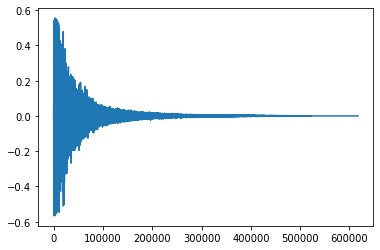

Listen to the first 1 second.


In [18]:
# Load example wave.
train_files = sorted(FSD2018_ROOT.glob('FSDKaggle2018.audio_train/*.wav'))

print(f'Training set has {len(train_files)} files. First file:', train_files[0])
waveform, sr = torchaudio.load(train_files[0])
plt.plot(waveform.t().numpy()); plt.show()
print('Listen to the first 1 second.')
Audio(waveform[0, :sr], rate=sr)

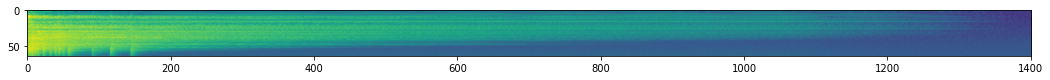

In [19]:
# Instantiate mel spectrogram converter 
to_mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=cfg.sample_rate, n_fft=cfg.n_fft, n_mels=cfg.n_mels,
    hop_length=cfg.hop_length, f_min=cfg.f_min, f_max=cfg.f_max)

# Waveform to log-mel spectrogram
log_mel_spec = to_mel_spectrogram(waveform).log()

plt.figure(figsize=(18,5))
plt.imshow(log_mel_spec[0])

## Preprocess audio files: convert to log-mel spectrogram

In [20]:
folders = ['FSDKaggle2018.audio_test', 'FSDKaggle2018.audio_train']

for folder in folders:
    cur_folder = FSD2018_ROOT/folder
    filenames = sorted(cur_folder.glob('*.wav'))
    for filename in filenames:
        # Load waveform
        waveform, sr = torchaudio.load(filename)
        assert sr == cfg.sample_rate
        # To log-mel spectrogram
        log_mel_spec = to_mel_spectrogram(waveform).log()
        # Write to work
        (WORK/folder).mkdir(parents=True, exist_ok=True)
        np.save(WORK/folder/filename.name.replace('.wav', '.npy'), log_mel_spec)

In [21]:
# Shows number of files converted
!ls -1R {WORK} | grep .npy | wc -l

11073


# Training Models

In [22]:
# Essential PyTorch
import torch
import torchaudio

# Other modules used in this notebook
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Audio
import yaml
from easydict import EasyDict
from sklearn.model_selection import train_test_split


device = torch.device('cuda')
cfg.unit_length = int((cfg.clip_length * cfg.sample_rate + cfg.hop_length - 1) // cfg.hop_length)

print(cfg)

{'clip_length': 5.0, 'sample_rate': 44100, 'hop_length': 441, 'n_fft': 1024, 'n_mels': 64, 'f_min': 0, 'f_max': 22050, 'unit_length': 500}


In [23]:
### CONFIGURE YOURS ###
FSD2018_ROOT = Path('work')
WORK = Path('work')

In [24]:
# https://github.com/DCASE-REPO/dcase2018_baseline/blob/master/task2/evaluation.py
TOP_N = 3


def avg_precision(gts=None, topks=None):
    def one_ap(gt, topk):
        for (i, p) in enumerate(topk):
              if gt == p:
                    return 1.0 / (i + 1.0)
        return 0.0
    return np.array([one_ap(gt, topk) for gt, topk in zip(gts, topks)])


def eval_acc_map(model, device, dataloader, debug_name=None, n=3):
    model = model.to(device).eval()
    count = correct = ap = 0.0
    for _ in range(n):
        for X, gts in dataloader:
            preds = model(X.to(device))
            _, topks = torch.topk(preds, k=TOP_N, dim=1)
            topks = topks.cpu()
            correct += (topks[:, 0] == gts).sum()
            ap += avg_precision(gts, topks).sum()
            count += len(gts)
    acc = correct / count
    mAP = ap / count
    if debug_name:
        print(f'{debug_name} acc = {acc:.4f}, mAP@{TOP_N} = {mAP}')
    return acc, mAP

## FSDKaggle2018: Load meta data to variables

In [25]:
# Make lists of filenames and labels from meta files
filenames, labels = {}, {}
for split, npy_folder, meta_filename in [['train', 'work/FSDKaggle2018.audio_train', 'train_post_competition.csv'],
                                                                     ['test', 'work/FSDKaggle2018.audio_test', 'test_post_competition_scoring_clips.csv']]:
    df = pd.read_csv(FSD2018_ROOT/'FSDKaggle2018.meta'/meta_filename)
    filenames[split] = [(npy_folder + '/' + fname.replace('.wav', '.npy')) for fname in df.fname.values]
    labels[split] = list(df.label.values)

# Make a list of classes, converting labels into numbers
classes = sorted(set(labels['train'] + labels['test']))
for split in labels:
    labels[split] = [classes.index(label) for label in labels[split]]

print(filenames['train'][:3])
print(labels['train'][:3])
print(len(classes), classes[:3])

['work/FSDKaggle2018.audio_train/00044347.npy', 'work/FSDKaggle2018.audio_train/001ca53d.npy', 'work/FSDKaggle2018.audio_train/002d256b.npy']
[23, 30, 38]
41 ['Acoustic_guitar', 'Applause', 'Bark']


In [26]:
from sklearn.utils.class_weight import compute_class_weight


class_weight = compute_class_weight('balanced', range(len(classes)), labels['train'] )
print('class weight', class_weight)

filenames['train'], filenames['valid'], labels['train'], labels['valid'] = train_test_split(
     filenames['train'],  labels['train'], test_size=0.1, random_state=42)
print(f'Number of train/val files are = {len(filenames["train"])}/{len(filenames["valid"])}')
print('First 3 samples assigned to validation set:')
print(filenames['valid'][:3])
print(labels['valid'][:3])

class weight [0.7701626  0.7701626  0.9667313  0.7701626  1.10023229 2.11971358
 0.7701626  2.00911983 0.7701626  1.94158639 0.95081803 1.20967948
 0.7701626  1.46233405 1.5403252  0.7701626  1.9747759  0.7701626
 0.7701626  2.45796575 0.79126295 1.57176041 1.40029564 0.7701626
 1.66222144 0.82813183 0.7701626  1.49063729 1.58252589 0.7727384
 0.7701626  2.43209243 0.7701626  0.7701626  0.7701626  1.04546959
 0.7701626  1.9254065  0.7701626  0.7701626  0.85573622]
Number of train/val files are = 8525/948
First 3 samples assigned to validation set:
['work/FSDKaggle2018.audio_train/60f9e3ed.npy', 'work/FSDKaggle2018.audio_train/3e20cc09.npy', 'work/FSDKaggle2018.audio_train/e3278076.npy']
[17, 37, 1]


In [27]:
def sample_length(log_mel_spec):
    return log_mel_spec.shape[-1]


class MyDataset(torch.utils.data.Dataset):
    def __init__(self, cfg, filenames, labels, transforms=None, normalize=False):
        assert len(filenames) == len(labels), f'Inconsistent length of filenames and labels.'

        self.filenames = filenames
        self.labels = labels
        self.transforms = transforms
        self.normalize = normalize

        # Calculate length of clip this dataset will make
        self.unit_length = cfg.unit_length

        # Test with first file
        assert self[0][0].shape[-1] == self.unit_length, f'Check your files, failed to load {filenames[0]}'

        # Show basic info.
        print(f'Dataset will yield log-mel spectrogram {len(self)} data samples in shape [1, {cfg.n_mels}, {self.unit_length}]')

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, index):
        assert 0 <= index and index < len(self)
        
        log_mel_spec = np.load(self.filenames[index])
        
        # normalize - instance based
        if self.normalize:
            _m, _s = log_mel_spec.mean(),  log_mel_spec.std() + np.finfo(np.float).eps
            log_mel_spec = (log_mel_spec - _m) / _s

        # Padding if sample is shorter than expected - both head & tail are filled with 0s
        pad_size = self.unit_length - sample_length(log_mel_spec)
        if pad_size > 0:
            offset = pad_size // 2
            log_mel_spec = np.pad(log_mel_spec, ((0, 0), (0, 0), (offset, pad_size - offset)), 'constant')

        # Random crop
        crop_size = sample_length(log_mel_spec) - self.unit_length
        if crop_size > 0:
            start = np.random.randint(0, crop_size)
            log_mel_spec = log_mel_spec[..., start:start + self.unit_length]

        # Apply augmentations
        log_mel_spec = torch.Tensor(log_mel_spec)
        if self.transforms is not None:
            log_mel_spec = self.transforms(log_mel_spec)

        return log_mel_spec, self.labels[index]


train_dataset = MyDataset(cfg, filenames['train'], labels['train'])
valid_dataset = MyDataset(cfg, filenames['valid'], labels['valid'])
test_dataset = MyDataset(cfg, filenames['test'], labels['test'])

BS = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BS, shuffle=True, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BS, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BS, pin_memory=True)

Dataset will yield log-mel spectrogram 8525 data samples in shape [1, 64, 500]
Dataset will yield log-mel spectrogram 948 data samples in shape [1, 64, 500]
Dataset will yield log-mel spectrogram 1600 data samples in shape [1, 64, 500]


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy
from dlcliche.torch_utils import IntraBatchMixup


class MyLearner(pl.LightningModule):

    def __init__(self, model, learning_rate=3e-4, mixup_alpha=0.0, weight=None):
        super().__init__()
        self.learning_rate = learning_rate
        self.model = model
        self.criterion = nn.NLLLoss(weight=weight)
        self.batch_mixer = IntraBatchMixup(self.criterion, alpha=mixup_alpha) if mixup_alpha > 0.0 else None

    def forward(self, x):
        x = self.model(x)
        x = F.log_softmax(x, dim=1)
        return x

    def step(self, x, y, train):
        if self.batch_mixer is None:
            preds = self(x)
            loss = self.criterion(preds, y)
        else:
            x, stacked_y = self.batch_mixer.transform(x, y, train=train)
            preds = self(x)
            loss = self.batch_mixer.criterion(preds, stacked_y)
        return preds, loss

    def training_step(self, batch, batch_idx):
        x, y = batch
        preds, loss = self.step(x, y, train=True)
        return loss

    def validation_step(self, batch, batch_idx, split='val'):
        x, y = batch
        preds, loss = self.step(x, y, train=False)
        yhat = torch.argmax(preds, dim=1)
        acc = accuracy(yhat, y)

        self.log(f'{split}_loss', loss, prog_bar=True)
        self.log(f'{split}_acc', acc, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        return self.validation_step(batch, batch_idx, split='test')

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def train_dataloader(self):
        return train_loader

    def val_dataloader(self):
        return valid_loader

    def test_dataloader(self):
        return test_loader

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F


# Mostly borrowed from https://github.com/pytorch/examples/blob/master/mnist/main.py
class Net(nn.Module):
    def __init__(self, n_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.pooling = nn.AdaptiveAvgPool2d((8, 8)) # extended
        self.fc1 = nn.Linear(16384, 128)
        self.fc2 = nn.Linear(128, n_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = self.pooling(x)

        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [33]:
%%time
learner = MyLearner(Net(len(classes)))
checkpoint = pl.callbacks.ModelCheckpoint(monitor='val_acc')
trainer = pl.Trainer(gpus=1, max_epochs=100, callbacks=[checkpoint])
trainer.fit(learner)

learner.load_state_dict(torch.load(checkpoint.best_model_path)['state_dict'])
eval_acc_map(learner.model, device, learner.val_dataloader(), 'val')
eval_acc_map(learner.model, device, learner.test_dataloader(), 'test');

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type    | Params
--------------------------------------
0 | model     | Net     | 2.5 M 
1 | criterion | NLLLoss | 0     
--------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params



val acc = 0.7940, mAP@3 = 0.8398968588842004
test acc = 0.7763, mAP@3 = 0.8353819444444444
CPU times: user 47min 4s, sys: 33min 49s, total: 1h 20min 54s
Wall time: 1h 20min 49s


In [34]:
%%time
from models import resnetish18

learner = MyLearner(resnetish18(len(classes)))
checkpoint = pl.callbacks.ModelCheckpoint(monitor='val_acc')
trainer = pl.Trainer(gpus=1, max_epochs=100, callbacks=[checkpoint])
trainer.fit(learner)

learner.load_state_dict(torch.load(checkpoint.best_model_path)['state_dict'])
eval_acc_map(learner.model, device, learner.val_dataloader(), 'val')
eval_acc_map(learner.model, device, learner.test_dataloader(), 'test');

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type      | Params
----------------------------------------
0 | model     | ResNetish | 11.2 M
1 | criterion | NLLLoss   | 0     
----------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params



val acc = 0.8323, mAP@3 = 0.869608532583216
test acc = 0.8269, mAP@3 = 0.8730208333333335
CPU times: user 2h 13min 59s, sys: 1h 39min 51s, total: 3h 53min 51s
Wall time: 3h 54min 3s


In [35]:
%%time
from models import VGGish

learner = MyLearner(VGGish(len(classes)))
checkpoint = pl.callbacks.ModelCheckpoint(monitor='val_acc')
trainer = pl.Trainer(gpus=1, max_epochs=100, callbacks=[checkpoint])
trainer.fit(learner)

learner.load_state_dict(torch.load(checkpoint.best_model_path)['state_dict'])
eval_acc_map(learner.model, device, learner.val_dataloader(), 'val')
eval_acc_map(learner.model, device, learner.test_dataloader(), 'test');

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type    | Params
--------------------------------------
0 | model     | VGGish  | 72.1 M
1 | criterion | NLLLoss | 0     
--------------------------------------
72.1 M    Trainable params
0         Non-trainable params
72.1 M    Total params



val acc = 0.7911, mAP@3 = 0.8386661978434131
test acc = 0.8037, mAP@3 = 0.8521527777777778
CPU times: user 44min 25s, sys: 31min 51s, total: 1h 16min 16s
Wall time: 1h 16min 54s
